In [6]:
#1 환경준비
from tensorflow.keras.models import Sequential 
#텐서플로의 케라스 API에서 필요한 함수들을 불러오기
from tensorflow.keras.layers import Dense     
#데이터를 다루는데 필요한 라이브러리를 불러오기
import numpy as np

In [12]:
#2. 데이터 준비
Data_set = np.loadtxt('https://raw.githubusercontent.com/SoongMoo/soldesk20231218/main/data/ThoraricSurgery3.csv', delimiter = ',')
#준비된 수술 환자 데이터 불러오기
X = Data_set[:, 0:16]
#환자의 진찰기록을 X로 지정
y = Data_set[:, 16]
#환자의 수술후 사망/생존 여부를 y로 지정 0 / 1

In [13]:
#3. 구조결정
model = Sequential()
#딥러닝 모델의 구조
model.add(Dense(30, input_dim=16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
#모델 실행
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#딥러닝 모델을 실행
history = model.fit(X,y,epochs=5,batch_size=16)

Epoch 1/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4416 - accuracy: 0.8511
Epoch 2/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4362 - accuracy: 0.8511
Epoch 3/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4370 - accuracy: 0.8511
Epoch 4/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4359 - accuracy: 0.8511
Epoch 5/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4314 - accuracy: 0.8511


In [16]:
x = np.array([2,4,6,8])
y = np.array([81,93,91,97])

In [25]:
#가상의 기울기 a와 y절편 b를 정하기
fake_a = 3
fake_b = 76
# y=ax + b 에 가상의 a,b값을 대입한 결과를 출력하는 함수
def predict(x):
    return fake_a*x + fake_b

#x값의 평균
mx = np.mean(x)
#y값의 평균
my = np.mean(y)

print(mx)
print(my)

#기울기 공식의 분모
#l = []
#for i in x:
#    l.append((i - mx) ** 2)

    #프리헨션 방식
    #l = [(i-mx)**2 for i in x]

divisor = sum([(i-mx)**2 for i in x])

def top(x,mx,y,my):
    d=0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d

dividend = top(x,mx,y,my)
print(divisor, dividend)

###################################

#기울기 a
a = dividend / divisor

#y절편 b
b = my - (mx * a)
print(a,b) 
#a = 2.3, b = 79.0 -> y = 2.3x + 79

5.0
90.5
20.0 46.0
2.3 79.0


In [28]:
#가상의 기울기 a와 y절편 b를 정하기
fake_a = 2.3
fake_b = 79.0
# y=ax + b 에 가상의 a,b값을 대입한 결과를 출력하는 함수
def predict(x):
    return fake_a*x + fake_b

#예측값이 들어갈 빈리스트
predict_result = []
for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print(x[i],y[i],predict_result)

#평균 제곱 오차 함수
n = len(x)
def mse(y,y_pred):
    return (1/n) * sum((y - y_pred)**2)
print("평균 제곱 오차 : ", mse(y,predict_result))

2 81 [83.6]
4 93 [83.6, 88.2]
6 91 [83.6, 88.2, 92.8]
8 97 [83.6, 88.2, 92.8, 97.4]
평균 제곱 오차 :  8.299999999999985


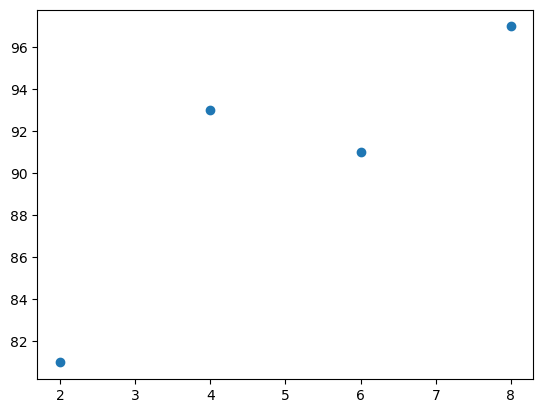

In [35]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

In [47]:
#기울기 0의 값과 y절편 0의 값
a = 0
b = 0
#학습률
lr = 0.03
#몇번 반복될지 설정
epochs = 2001
#x값이 총 몇개인지 파악
n = len(x)
#경사하강법 시작
for i in range(epochs):
    #예측값 구하는 식
    y_pred = a * x + b
    error = y - y_pred
    #오차함수를 a로 편미분한 값
    a_diff = (2/n) * sum(-x * (error))
    #오차함수를 b로 편미분한 값
    b_diff = (2/n) * sum(-(error))
    #학습률을 곱해서 a값을 구한다
    a = a-lr*a_diff
    b = b-lr*b_diff
    if i % 100 ==0:
        print(i,a,b)

0 27.84 5.43
100 7.073858435872394 50.51166161138297
200 4.095999380762421 68.28224379060177
300 2.9756829100119027 74.96781336233505
400 2.5542024233262106 77.48302865233052
500 2.3956349066513707 78.42929177728175
600 2.3359793398132864 78.78529068727728
700 2.313535987420573 78.91922301600925
800 2.3050924490666174 78.96961044185792
900 2.3019158585694823 78.98856697541248
1000 2.3007207758016315 78.99569871827002
1100 2.300271167070735 78.99838179089187
1200 2.3001020172709508 78.9993912045567
1300 2.300038380484562 78.99977096168232
1400 2.3000144393354365 78.9999138322214
1500 2.3000054323026444 78.99996758234106
1600 2.300002043716771 78.99998780397235
1700 2.3000007688780433 78.99999541166466
1800 2.300000289263884 78.99999827379686
1900 2.3000001088255795 78.9999993505755
2000 2.3000000409418653 78.99999975567644


In [49]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense     
import numpy as np

x = np.array([2,4,6,8])
y = np.array([81,93,91,97])

#모델실행
model = Sequential()
        #출력갯수: 1 /  #입력갯수 : 1
model.add(Dense(1,input_dim=1,activation='linear')) #linear : 함수 종류, 선형회귀 : 활성화 함수

#오차수정을 위한 경사하강법(sgd), 오차의 정도를 판단 = 평균제곱오차(mse)
model.compile(optimizer='sgd', loss='mse')
model.fit(x,y,epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 206ms/step - loss: 8809.5605
Epoch 2/2000
1/1 [==============================] - 0s 4ms/step - loss: 2124.0325
Epoch 3/2000
1/1 [==============================] - 0s 3ms/step - loss: 1136.7659
Epoch 4/2000
1/1 [==============================] - 0s 3ms/step - loss: 986.4664
Epoch 5/2000
1/1 [==============================] - 0s 4ms/step - loss: 959.1307
Epoch 6/2000
1/1 [==============================] - 0s 4ms/step - loss: 949.8894
Epoch 7/2000
1/1 [==============================] - 0s 3ms/step - loss: 943.3394
Epoch 8/2000
1/1 [==============================] - 0s 5ms/step - loss: 937.2185
Epoch 9/2000
1/1 [==============================] - 0s 13ms/step - loss: 931.1939
Epoch 10/2000
1/1 [==============================] - 0s 5ms/step - loss: 925.2168
Epoch 11/2000
1/1 [==============================] - 0s 5ms/step - loss: 919.2795
Epoch 12/2000
1/1 [==============================] - 0s 4ms/step - loss: 913.3809
Epoch 13/2000
1/1 [

In [51]:
hour = 7
prediction = model.predict([hour])
print(f'{hour}시간 공부한 예측점수는 {prediction}임')

1/1 [==============================] - 0s 36ms/step
7시간 공부한 예측점수는 [[95.11994]]임


In [53]:

x = np.array([[2, 0], [4, 4], [6, 2], [8, 3]])
y = np.array([81, 93, 91, 97])

# 모델 실행
model = Sequential()
# 출력 갯수: 1 / 입력 갯수: 2 (입력 데이터의 차원)
model.add(Dense(1, input_dim=2, activation='linear'))

# 오차 수정을 위한 경사하강법(sgd), 오차의 정도를 판단 = 평균 제곱 오차(mse)
model.compile(optimizer='sgd', loss='mse')
model.fit(x, y, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 194ms/step - loss: 8827.2246
Epoch 2/2000
1/1 [==============================] - 0s 3ms/step - loss: 1481.1240
Epoch 3/2000
1/1 [==============================] - 0s 3ms/step - loss: 958.9275
Epoch 4/2000
1/1 [==============================] - 0s 3ms/step - loss: 916.6948
Epoch 5/2000
1/1 [==============================] - 0s 3ms/step - loss: 908.2580
Epoch 6/2000
1/1 [==============================] - 0s 4ms/step - loss: 902.2370
Epoch 7/2000
1/1 [==============================] - 0s 3ms/step - loss: 896.4247
Epoch 8/2000
1/1 [==============================] - 0s 3ms/step - loss: 890.6656
Epoch 9/2000
1/1 [==============================] - 0s 3ms/step - loss: 884.9481
Epoch 10/2000
1/1 [==============================] - 0s 4ms/step - loss: 879.2708
Epoch 11/2000
1/1 [==============================] - 0s 3ms/step - loss: 873.6333
Epoch 12/2000
1/1 [==============================] - 0s 4ms/step - loss: 868.0350
Epoch 13/2000
1/1 [==

In [56]:
#1. 환경설정
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

#2. 데이터준비
x = np.array([2,4,6,8,10,12,14])
y = np.array([0,0,0,1,1,1,1])

#3. 모델실행
model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid')) #참 거짓을 다룰땐 시그모이드

#오차수정
model.compile(optimizer='sgd',loss='binary_crossentropy')
model.fit(x,y,epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 252ms/step - loss: 1.3223
Epoch 2/500
1/1 [==============================] - 0s 4ms/step - loss: 1.0937
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 0.9178
Epoch 4/500
1/1 [==============================] - 0s 4ms/step - loss: 0.7934
Epoch 5/500
1/1 [==============================] - 0s 4ms/step - loss: 0.7110
Epoch 6/500
1/1 [==============================] - 0s 4ms/step - loss: 0.6581
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 0.6242
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 0.6021
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5875
Epoch 10/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5775
Epoch 11/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5706
Epoch 12/500
1/1 [==============================] - 0s 4ms/step - loss: 0.5657
Epoch 13/500
1/1 [==============================] - 0s 4ms/

In [58]:
#예측
hour = 7
prediction = model.predict([hour])
print(hour,prediction,'%입니다')

1/1 [==============================] - 0s 37ms/step
7 [[0.6884929]] %입니다


In [60]:
#1. 환경설정
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

#가중치와 바이어스
w11 = np.array([-2,-2])
w12 = np.array([2,2])
w2 = np.array([1,1])
b1 = 3
b2 = -1
b3 = -1

#퍼셉트론
def MLP(x,w,b):
    y = np.sum(w*x) + b
    if y <= 0:
        return 0
    else:
        return 1

#AND게이트
def AND(x1,x2):
    return MLP(np.array([x1,x2]), w2, b3)

#OR게이트
def OR(x1,x2):
    return MLP(np.array([x1,x2]), w12, b2)

#NAND게이트
def NAND(x1,x2):
    return MLP(np.array([x1,x2]), w11, b1)

#XOR게이트
def XOR(x1,x2):
    return AND(NAND(x1,x2), OR(x1,x2))

for x in [(0,0),(1,0),(0,1),(1,1)]:
    y = XOR(x[0],x[1])
    print('(',x[0],x[1],') : ', y)

( 0 0 ) :  0
( 1 0 ) :  1
( 0 1 ) :  1
( 1 1 ) :  0
